# Домашнее задание по кластеризации

Сегментация клиентов — это разделение рынка на отдельные группы клиентов со схожими характеристиками. Сегментация клиентов может быть мощным средством выявления неудовлетворенных потребностей клиентов. Используя вышеуказанные данные, компании могут превзойти конкурентов, разработав уникальные привлекательные продукты и услуги.

Вы владеете супермаркетом и с помощью членских карт у вас есть некоторые основные данные о ваших клиентах, такие как идентификатор клиента, возраст, пол, годовой доход и оценка расходов.

Вы хотите понять клиентов, например, кто является целевыми клиентами, чтобы это можно было передать маркетинговой команде и соответствующим образом спланировать стратегию.

Для этого вам нужно разбить клиентов на различные группы по похожести.

## Задания

### Задание 1.

Провести исследование данных с визуализацией:
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `Age` и `Income`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `Sex`.
5. Построить матрицу корреляции для всех переменных.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np


<Figure size 720x432 with 0 Axes>

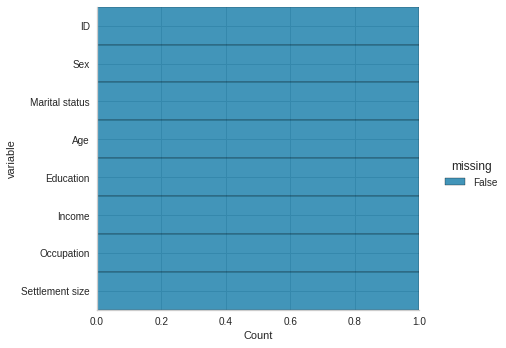

In [33]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

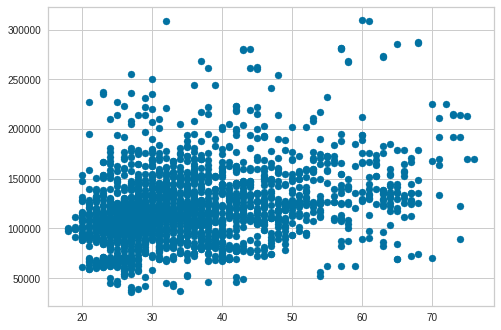

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_2/main/home_work_clustering/segmentation%20data.csv'
df = pd.read_csv(url)

fig, ax = plt.subplots()
ax.scatter(df.Age, df.Income)
plt.show()
# Плохо видно зависимость между возрастом и доходом клиента

### Задание 2

Реализовать метод кластарезации KMeans:
1. Методом локтя и силуета (в том числе с использованием графиков) оценить оптимальное число кластеров и обосновать его.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных. 

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

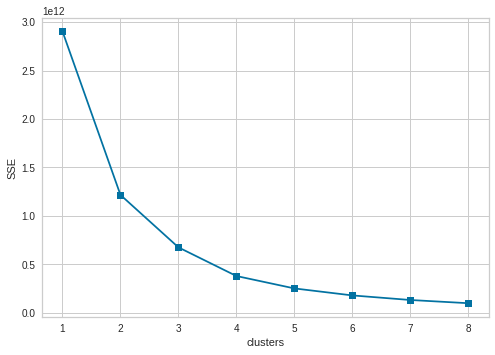

In [31]:
SSE = [] 

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('clusters')
plt.ylabel('SSE');
plt.show()
#Из графика видно, что лучше всего взять 4 кластера
     

### Задание 3

Реализовать иерархический метод кластарезации:
1. Должны быть построены дендрограммы и обоснован выбор количества кластеров.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных.

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

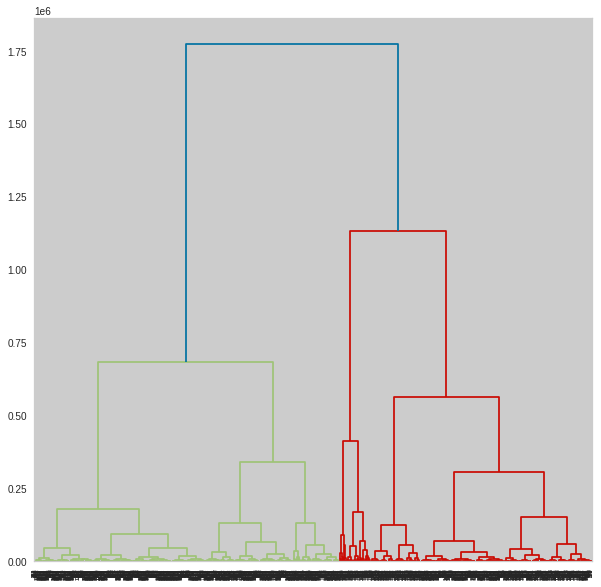

In [32]:

#1
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, 'ward')

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
#тяжело понять какое количество количество кластеров нужно взять, но на мой взгляд лучше всего взять 4 кластера